## DESCRIPTION

🌦️ Dataset Overview¶
The Weather Forecast Dataset consists of 2,500 observations with various weather-related features. This dataset is designed for practicing machine learning, specifically for classification tasks, by predicting the occurrence of rain based on specific weather conditions.

📊 Features in the Dataset:

🌡️ Temperature: Temperature recorded in degrees Celsius.

💧 Humidity: Relative humidity measured as a percentage.

💨 Wind Speed: Wind speed measured in km/h.

☁️ Cloud Cover: Percentage of the sky covered by clouds.

🔍 Pressure: Atmospheric pressure measured in hPa (hectopascals).

🌧️ Rain: The target variable for classification, indicating the occurrence of rain. It is a binary variable with two possible values: rain and no rain.

⚙️ Key Characteristics:

1.Balanced Features: The dataset includes a mix of weather parameters that influence rainfall, providing a comprehensive overview of atmospheric conditions.

2.Class Imbalance: The Rain feature exhibits an imbalance, with a higher number of no rain instances compared to rain. This is an important consideration for model training and evaluation.

3.Data Types: There are five numerical features (Temperature, Humidity, Wind_Speed, Cloud_Cover, and Pressure) and one categorical feature (Rain).

🎯 Objective:
The primary goal is to build a classification model that accurately predicts whether it will rain based on the input weather conditions. This involves:

1.Analyzing relationships between different weather features and rainfall.

2.Building predictive models using machine learning techniques.

3.Evaluating model performance to determine which features contribute most to predicting rainfall.

4.Hypothesis Testing: Conduct hypothesis testing to understand whether specific features such as Humidity, Cloud Cover, Temperature, Pressure, and Wind Speed have a statistically significant impact on the occurrence of rain.


In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import ttest_ind

from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [8]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>LOADING AND EXPLORATION OF THE DATASET</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

In [2]:
## Loading the Dataset 
df = pd.read_csv (r'C:\Users\acer\Documents\JN\weather_forecast_data.csv')

In [3]:
# Verify shapes
print("Data Shape:", df.shape)

# Display the first few rows
print("Dataset: \n")
display(df.head())

Data Shape: (2500, 6)
Dataset: 



,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [4]:
# Display information for the dataset
print("Dataset Information: \n")
train_info = df.info()
display(train_info)
print('\n')
print("Dataset Statistical Summary: \n")
display(df.describe().T)

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


None



Dataset Statistical Summary: 



,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,49.658104,29.123104,0.015038,23.900016,49.488284,75.324140,99.997795
Pressure,2500.0,1014.312336,20.196433,980.014486,996.938630,1013.433035,1031.735067,1049.985593


Dataset Information:

Data Shape: The dataset has 2,500 entries, and all columns are complete with no null values.

Columns: There are 5 numeric columns (Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure) and one object type column (Rain), which is the target variable for classification.

Dataset Statistical Summary:
Temperature: Ranges from 10 to about 35 degrees Celsius, with an average/mean temperature around 22.58 degrees.

Humidity: Shows a wide range from 30% to nearly 100%, with a mean value at around 64.35%.

Wind Speed: Varies from nearly 0 to 20 km/h, with an average close to 9.91 km/h.

Cloud Cover: Ranges from nearly 0% to 100%, indicating days from clear to completely overcast.

Pressure: Varies from 980 to about 1050 hPa, indicating typical variations in atmospheric pressure.


In [5]:
# Check for missing values in the dataset
print('--- Missing Values in dataset---\n')
df_missing = df.isnull().sum()
print(df_missing)
print('\n')
# Check for duplicate rows in the dataset
df_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {df_duplicates}")

--- Missing Values in dataset---

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


Number of duplicate rows in the dataset: 0


The dataset checks indicate:

Missing Values: There are no missing values in any of the columns.
Duplicate Rows: There are no duplicate rows in the dataset.

In [6]:
from IPython.display import display, HTML

In [9]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>UNIQUE VALUE EXPLORATION</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

In [10]:
# Display the number of unique values in each column of the dataset
print("Unique values in dataset:")
df_unique_counts = df.nunique()
print(df_unique_counts)

Unique values in dataset:
Temperature    2500
Humidity       2500
Wind_Speed     2500
Cloud_Cover    2500
Pressure       2500
Rain              2
dtype: int64


In [11]:
# Identifying numerical and non-numerical columns in the dataset
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("\nNumerical columns in the dataset:")
print(numerical_df)

print("\nNon-numerical columns in the dataset:")
print(non_numerical_df)


Numerical columns in the dataset:
['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

Non-numerical columns in the dataset:
['Rain']


In [12]:
# Display unique values for each categorical column
print("\nUnique values for each categorical column in the dataset:")
for col in non_numerical_df:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Unique values for each categorical column in the dataset:

Column: Rain
Unique Values: ['rain' 'no rain']


Unique Values in Dataset

Temperature: 2,500 unique values

Humidity: 2,500 unique values

Wind_Speed: 2,500 unique values

Cloud_Cover: 2,500 unique values

Pressure: 2,500 unique values
Rain: 2 unique values ('rain', 'no rain')

Columns by Data Type
Numerical Columns: ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

Non-numerical Columns: ['Rain']

Unique Values for Categorical Column
Column: Rain
Unique Values: ['rain', 'no rain']

This confirms that 'Rain' is the only categorical column and is binary, making it a straightforward target for classification tasks. The numerical columns cover all the weather-related features.

In [13]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>EXPLORATORY DATA ANALYSIS (EDA)</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

In [14]:
# Define a custom color map
colors = ['#0077b6', '#00b4d8', '#90e0ef','#d8b2ff', '#b266ff', '#4500e2' ]  
cmap = LinearSegmentedColormap.from_list("custom_blue_purple", colors, N=256)

# Set the color palette in seaborn
sns.set_palette(sns.color_palette(colors))

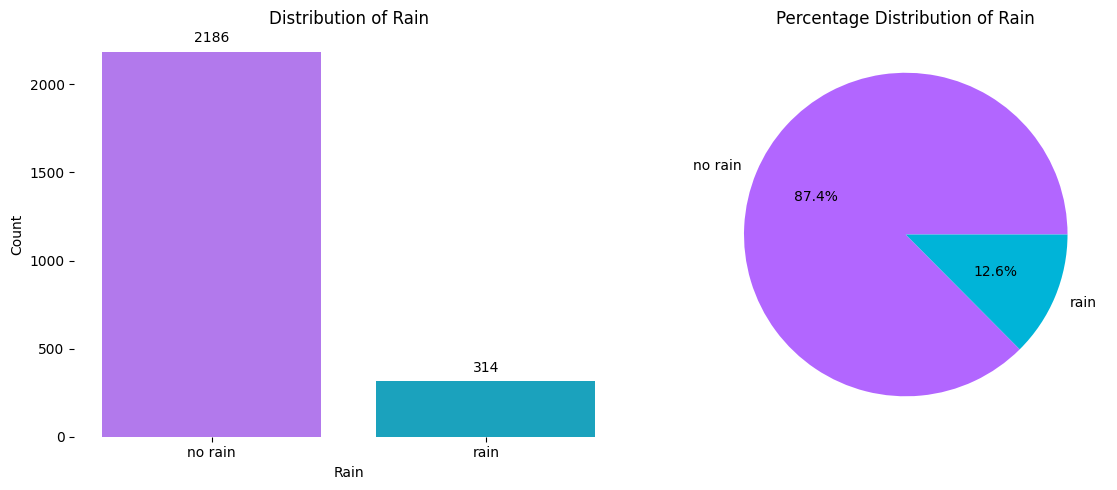

In [15]:
# Create subplots for the 'Rain' feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
color_selection = [colors[4], colors[1]] 

# Count plot for the Rain feature
rain_counts = df['Rain'].value_counts()
sns.barplot(x=rain_counts.index, y=rain_counts, ax=axes[0], palette=color_selection)  
axes[0].set_title('Distribution of Rain')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True) 

# Pie chart for the percentage distribution of the Rain feature
rain_percentage = df['Rain'].value_counts(normalize=True) * 100
axes[1].pie(rain_percentage, labels=rain_percentage.index, autopct='%1.1f%%',
            colors=color_selection)  
axes[1].set_title('Percentage Distribution of Rain')

plt.tight_layout()
plt.show()

Observations:

Class Imbalance:
The Rain feature is highly imbalanced.

About 87.4% of the observations correspond to no rain, while only 12.6% correspond to rain.

This indicates that the majority of days in the dataset did not experience rain.

The bar plot clearly shows a much larger count of no rain observations compared to rain.

The pie chart provides a percentage perspective, reinforcing the imbalance in the data.

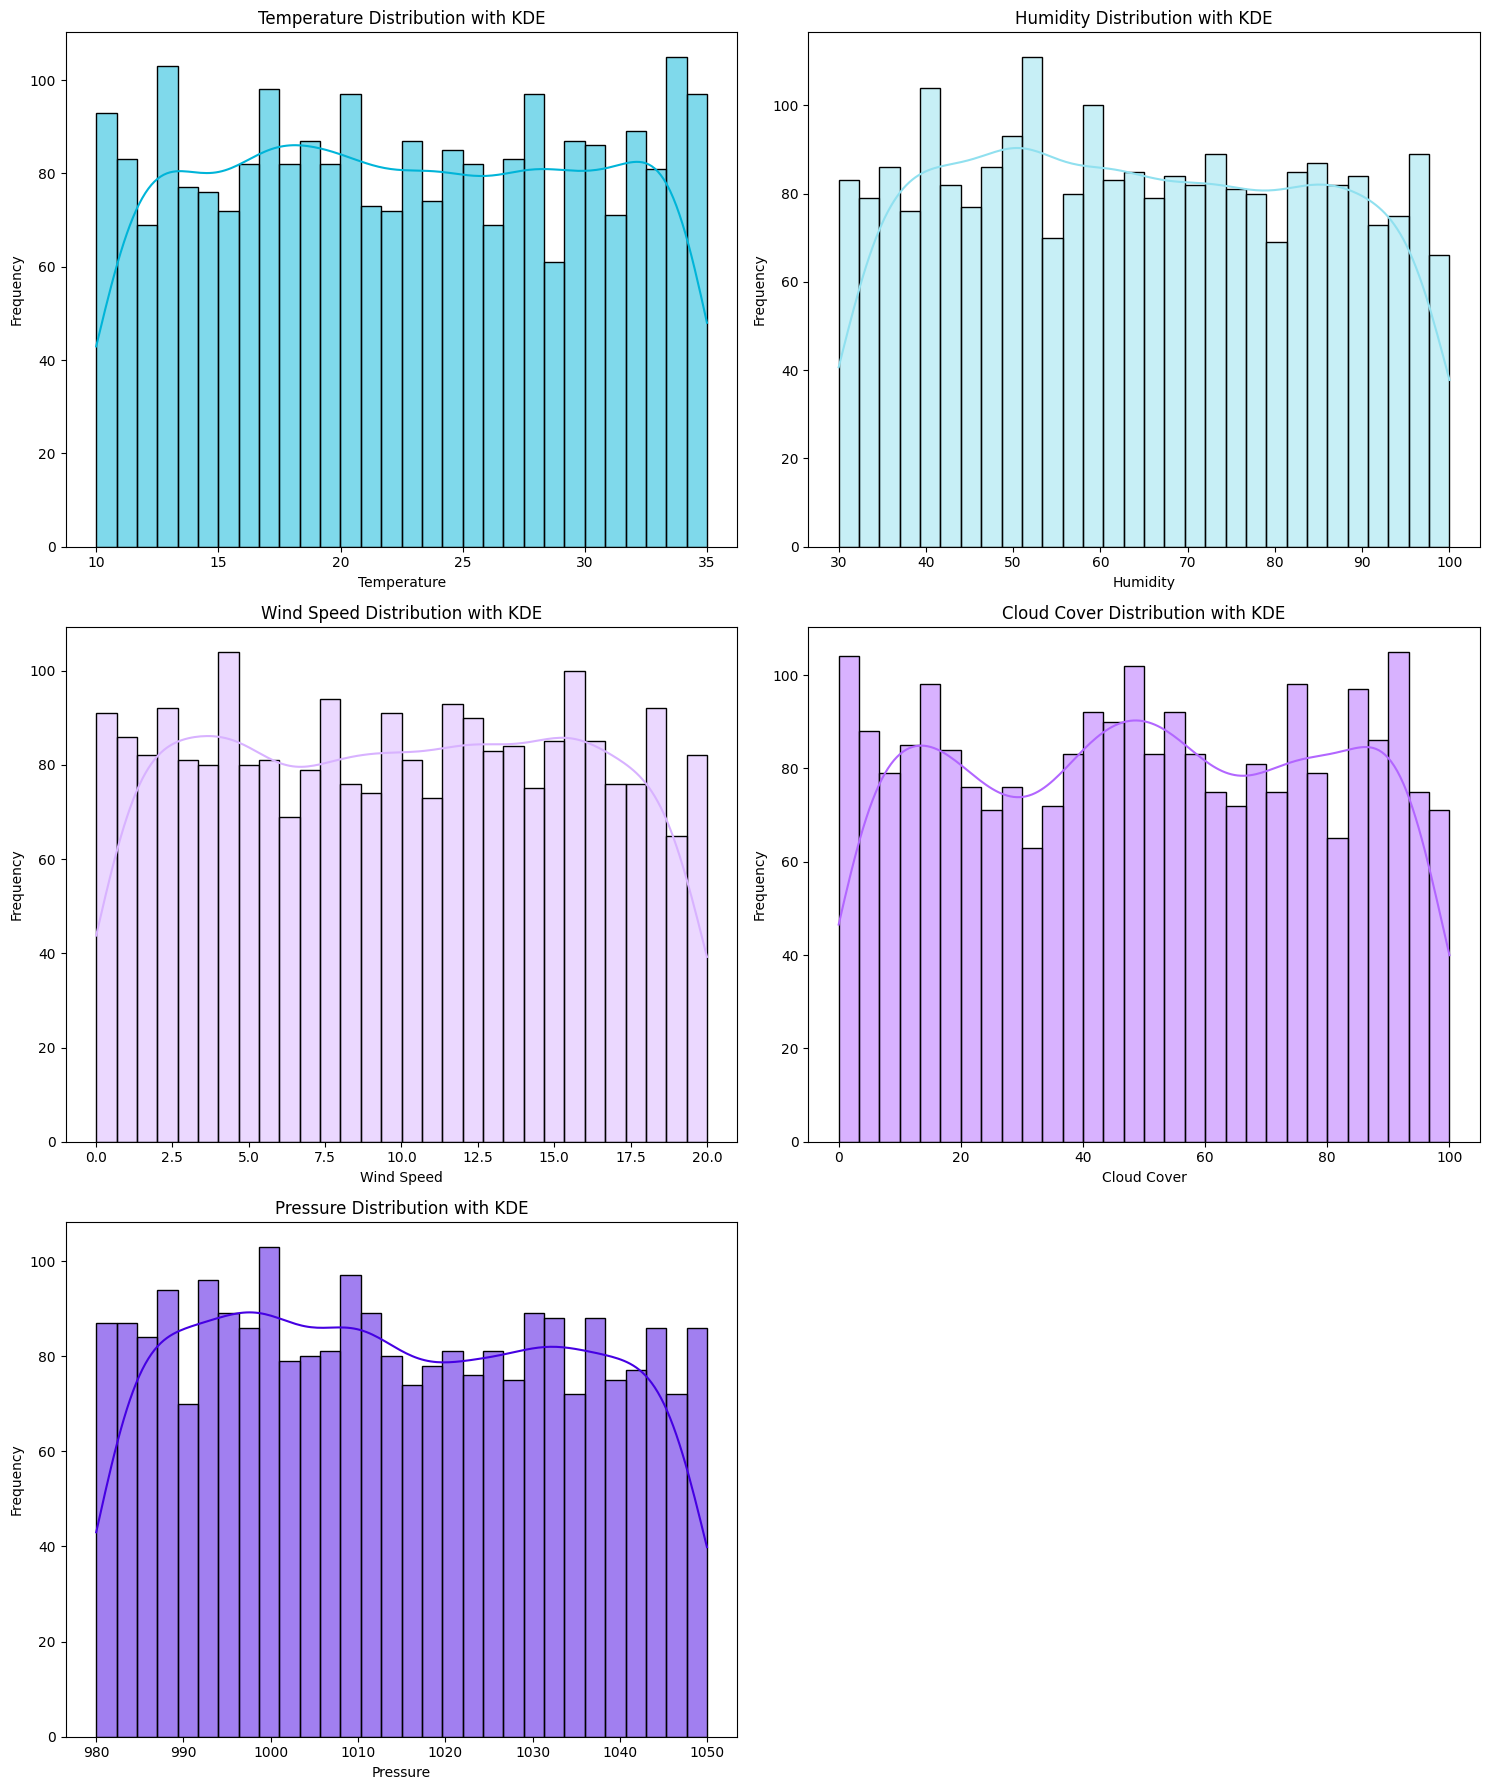

In [16]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(15, 18))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color=colors[i % len(colors)])  # Use cyclic color indexing
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

univariate_analysis(df, columns_to_analyze)

Insights:

Temperature: The distribution appears to be approximately normal with a peak around the mean value.

Humidity: Shows a slightly right-skewed distribution with a concentration around the mean, with some observations at higher levels.

Wind Speed: The distribution is right-skewed, indicating that lower wind speeds are more frequent than higher wind speeds.

Cloud Cover: Shows a fairly uniform distribution with values across the entire range, suggesting a variety of cloud cover levels in the data.

Pressure: The distribution is centered around the mean with a relatively symmetric shape, indicating that most pressure values are around the average.

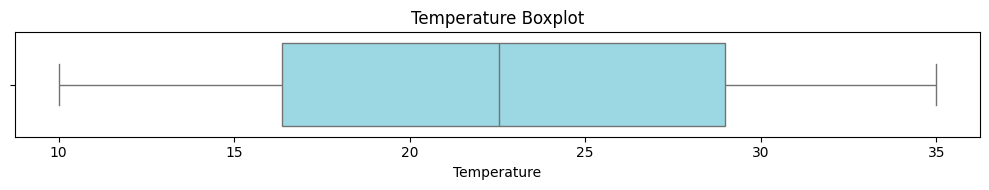


Summary Statistics for Temperature:
 count    2500.000000
mean       22.581725
std         7.326996
min        10.001842
25%        16.359398
50%        22.536448
75%        28.976476
max        34.995214
Name: Temperature, dtype: float64


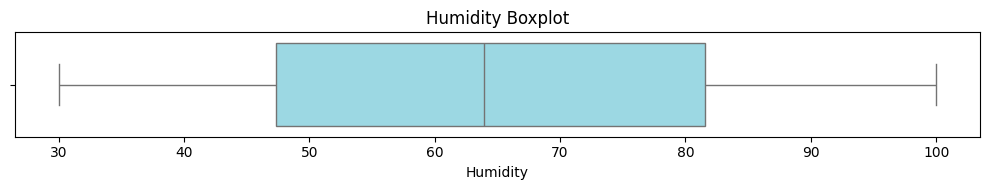


Summary Statistics for Humidity:
 count    2500.000000
mean       64.347094
std        19.954739
min        30.005071
25%        47.339815
50%        63.920797
75%        81.561021
max        99.997481
Name: Humidity, dtype: float64


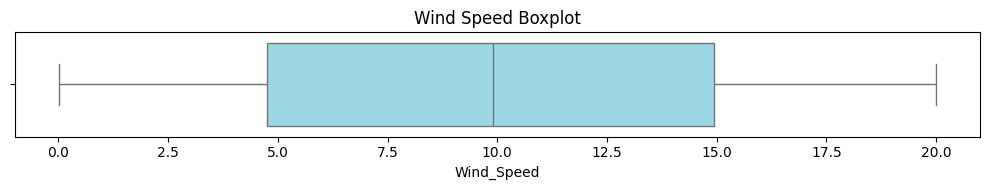


Summary Statistics for Wind Speed:
 count    2500.000000
mean        9.906255
std         5.780316
min         0.009819
25%         4.761909
50%         9.908572
75%        14.948408
max        19.999132
Name: Wind_Speed, dtype: float64


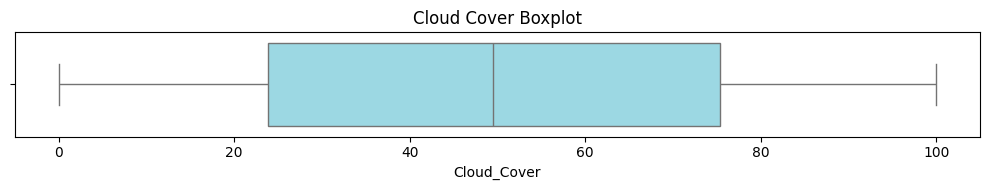


Summary Statistics for Cloud Cover:
 count    2500.000000
mean       49.658104
std        29.123104
min         0.015038
25%        23.900016
50%        49.488284
75%        75.324140
max        99.997795
Name: Cloud_Cover, dtype: float64


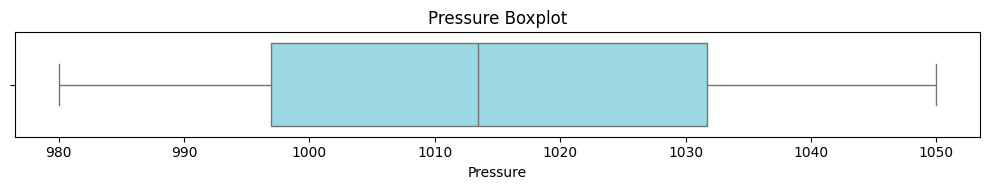


Summary Statistics for Pressure:
 count    2500.000000
mean     1014.312336
std        20.196433
min       980.014486
25%       996.938630
50%      1013.433035
75%      1031.735067
max      1049.985593
Name: Pressure, dtype: float64


In [17]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    # Use a custom color from the palette
    sns.boxplot(x=data[column], color=colors[2])  # Selected a color from the palette for consistency
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

<Figure size 800x500 with 0 Axes>

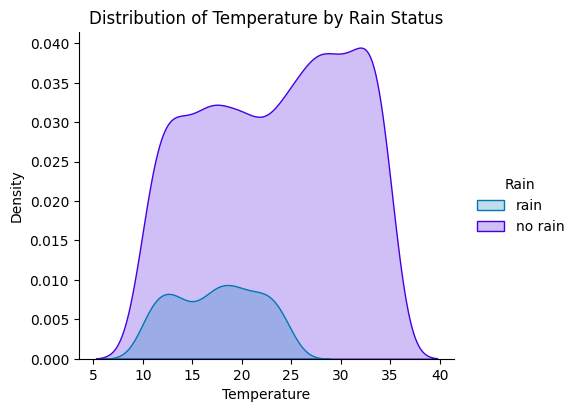

<Figure size 800x500 with 0 Axes>

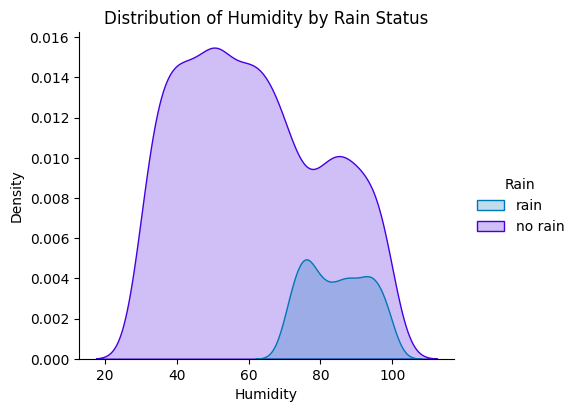

<Figure size 800x500 with 0 Axes>

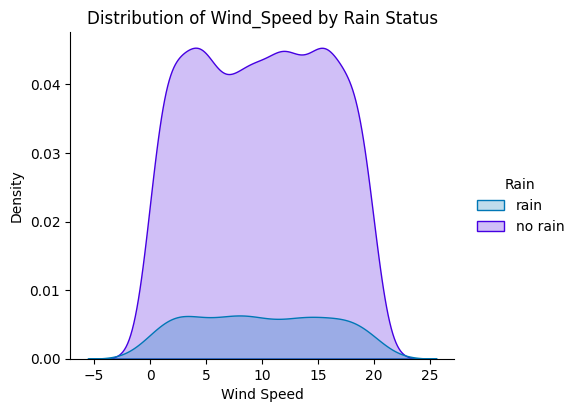

<Figure size 800x500 with 0 Axes>

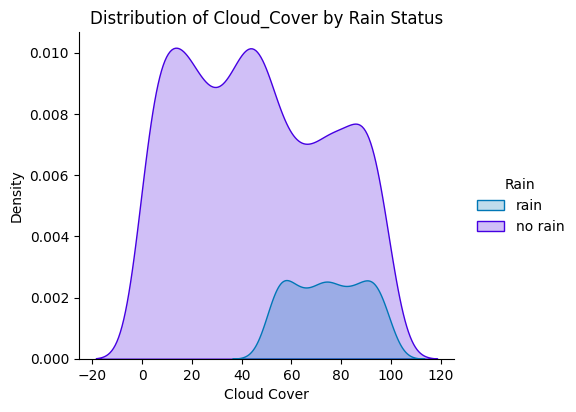

<Figure size 800x500 with 0 Axes>

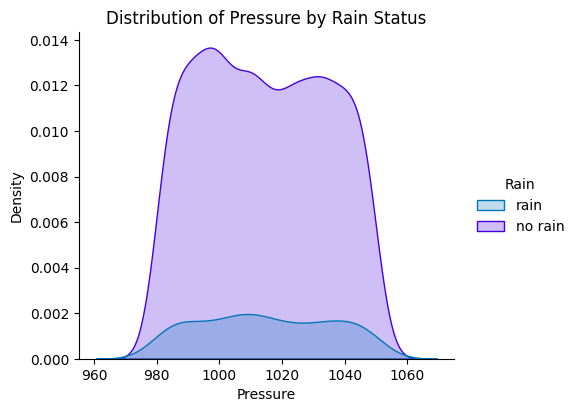

In [18]:
# Loop through each column and create a displot comparing distributions by 'Rain'
for column in columns_to_analyze:
    plt.figure(figsize=(8, 5))
    color_selection = [colors[0], colors[5]] 
    
    sns.displot(
        data=df,
        x=column,
        hue="Rain",
        kind="kde",
        fill=True,
        palette=color_selection,  
        height=4,
        aspect=1.2
    )
    
    plt.title(f'Distribution of {column} by Rain Status')
    plt.xlabel(column.replace('_', ' '))
    plt.ylabel('Density')
    plt.show()

Observations

Temperature:
There is a noticeable difference between the rain and no rain distributions.
The rain distribution appears to be slightly shifted towards lower temperatures compared to no rain.

Humidity:
Higher humidity levels are more associated with rain, as shown by the density peak for the rain category around higher humidity values.

Wind Speed:
The rain distribution shows a slight shift towards lower wind speeds compared to no rain.

Cloud Cover:
Higher cloud cover values are more prevalent for the rain category, as expected. The no rain distribution shows a wider range with a peak around moderate cloud cover values.

Pressure:
Lower pressure values are more commonly associated with rain, while no rain events are spread over a wider range of pressures.

These observations suggest that certain features such as humidity, cloud cover, and pressure have stronger associations with the Rain status.

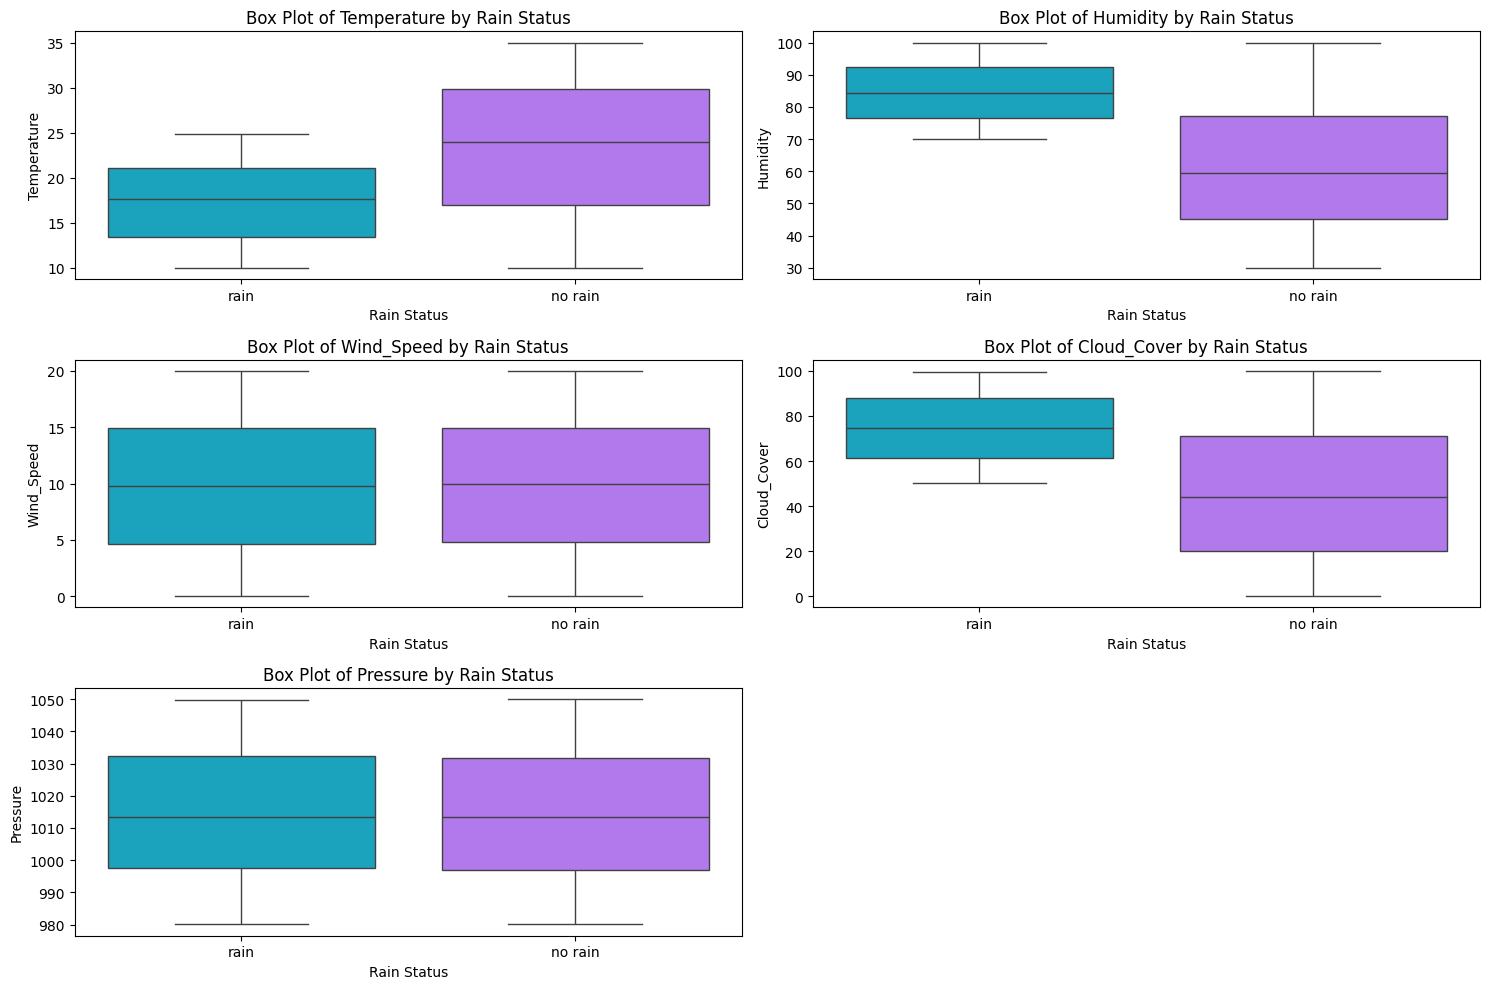

In [19]:
plt.figure(figsize=(15, 10))

# Loop through each column and create a box plot for each feature grouped by 'Rain'
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 2, i)
    
    color_selection = [colors[1], colors[4]]  
    
    sns.boxplot(x='Rain', y=column, data=df, palette=color_selection)
    plt.title(f'Box Plot of {column} by Rain Status')
    plt.xlabel('Rain Status')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Observations

1.Temperature:
The median temperature for rain events is slightly lower than for no rain.
There is a notable range of temperatures for both categories, with the interquartile range (IQR) for no rain extending to higher values.

2.Humidity:
The median humidity is higher for rain events, as expected.
There is a wider distribution of humidity values for no rain events, with lower median values.

3.Wind Speed:
The median wind speed for rain is slightly lower than for no rain.
There is significant overlap in the range of wind speeds for both categories.

4.Cloud Cover:
Higher cloud cover values are more common for rain events, with a higher median compared to no rain.
The range of cloud cover values is wider for no rain, but the distribution shows a lower median.

5.Pressure:
The median pressure is lower for rain events compared to no rain.
There is a broader distribution of pressure values for no rain events.


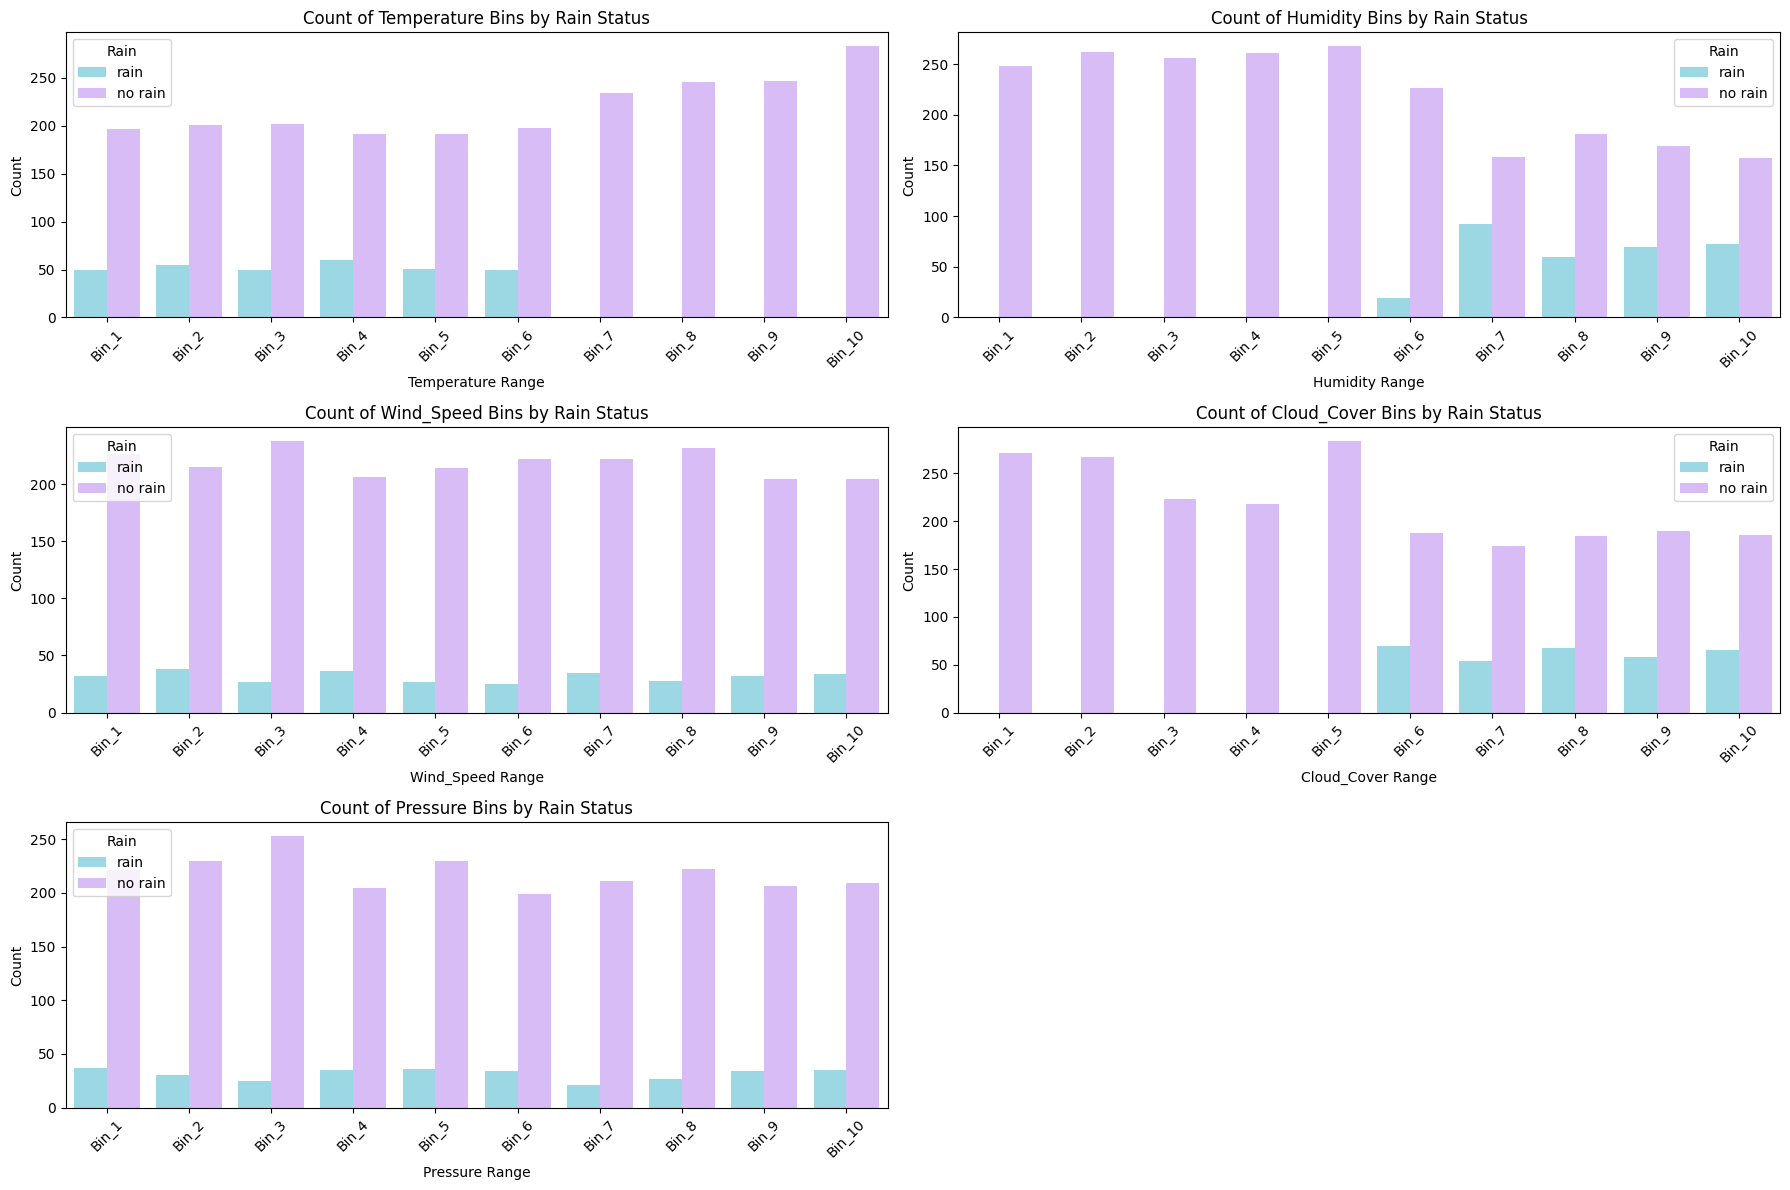

In [20]:
# Create a figure and set its size
plt.figure(figsize=(18, 12))
color_selection = [colors[2], colors[3]]

# Loop through each column and create a count plot for binned data
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 2, i)
    # Create bins for each numerical column
    bins = pd.cut(df[column], bins=10, labels=[f'Bin_{j+1}' for j in range(10)])
    # Count plot for each binned data
    sns.countplot(x=bins, hue=df['Rain'], palette=color_selection)
    plt.title(f'Count of {column} Bins by Rain Status')
    plt.xlabel(f'{column} Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

Observations:

1.Temperature:
Most no rain observations are distributed across bins with higher temperature ranges.
Rain events have a relatively even distribution across a moderate range of bins but are generally concentrated in lower temperature bins compared to no rain.

2.Humidity:
Higher bins for humidity show a significant increase in the count of rain events.
Lower humidity bins are dominated by no rain observations.

3.Wind Speed:
There is a relatively even distribution of no rain events across different wind speed bins.
Rain events tend to have more counts in bins with lower wind speeds.

4.Cloud Cover:
Higher cloud cover bins have a higher count of rain observations.
Lower bins for cloud cover are mostly populated with no rain observations.

5.Pressure:
Rain events are more concentrated in lower-pressure bins.
No rain observations span a broader range of pressure bins.


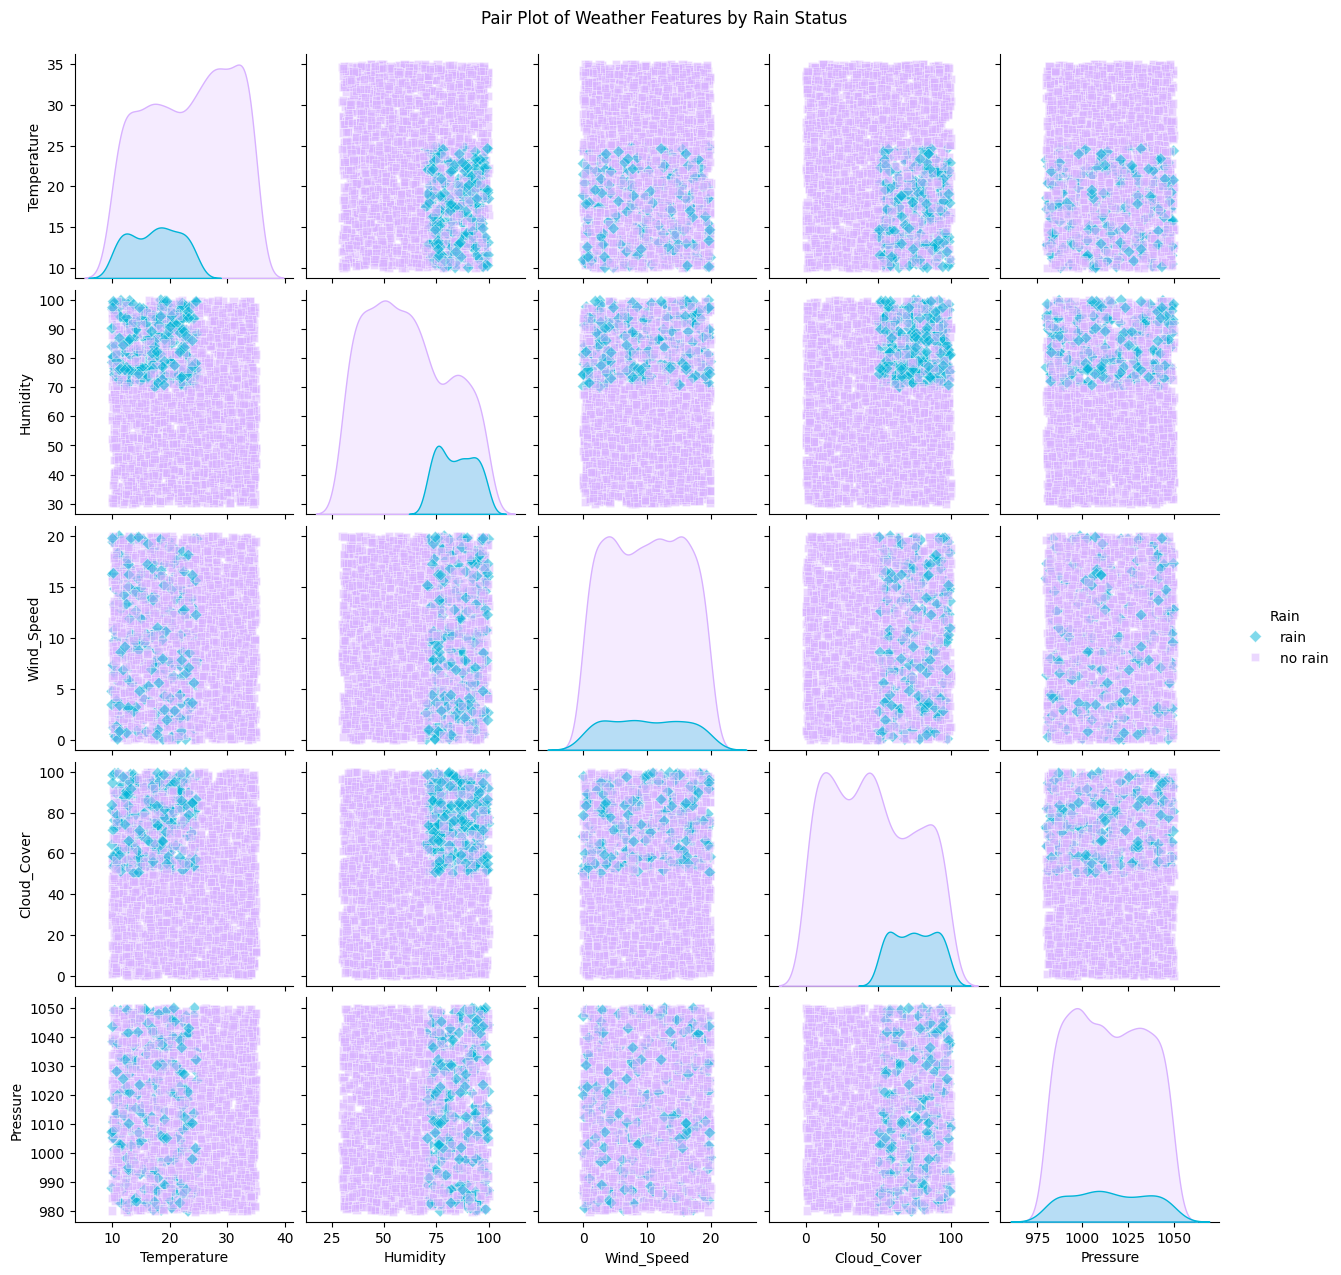

In [21]:
# List of columns to analyze plus the target 'Rain'
columns_for_pairplot = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'Rain']

color_selection = [colors[1], colors[3]]  

# Create the pair plot
pairplot = sns.pairplot(df[columns_for_pairplot], hue='Rain', palette=color_selection, 
                        markers=["D", "s"],  
                        plot_kws={'alpha': 0.5})  
pairplot.fig.suptitle('Pair Plot of Weather Features by Rain Status', y=1.02)  
plt.show()

Observations:

Scatter Plots: These show relationships between pairs of features, color-coded by Rain status (rain and no rain). Some features, such as Humidity and Cloud_Cover, show clustering or separation for different Rain categories.

The pair plot highlights the relationships between the features and their potential influence on predicting Rain.

In [22]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>CORRELATION ANALYSIS USING HEATMAPS</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

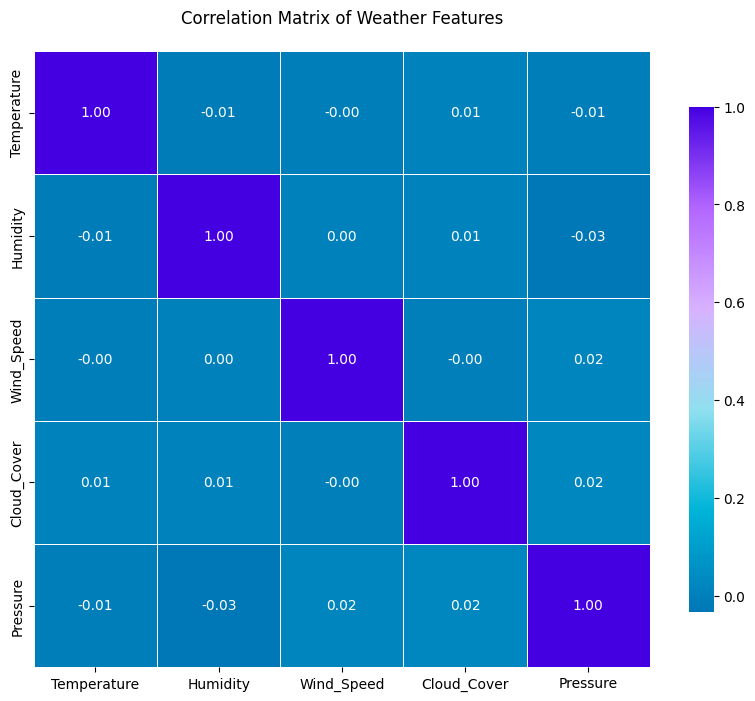

In [23]:
# Calculate the correlation matrix
correlation_matrix = df[columns_to_analyze].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar=True,
            cbar_kws={"shrink": .82},
            linewidths=.5, square=True)

# Title for the heatmap
plt.title('Correlation Matrix of Weather Features', pad=20)
plt.show()

Observations:

Low Correlation Among Features: The correlation values between the features are all close to 0, indicating very weak or no linear relationship between the features.

Independence of Features: This suggests that the weather features in this dataset do not exhibit strong linear dependencies on each other, which could be beneficial for modeling since it reduces the risk of multicollinearity.

In [24]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>DATA PROCESSING</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

In [26]:
# Label Encoding for 'Rain' to ensure it's in binary form
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1})

# Splitting data based on 'Rain' values (0 = no rain, 1 = rain)
rain_data = df[df['Rain'] == 1]
no_rain_data = df[df['Rain'] == 0]

Label Mapping:

'no rain': 0

'rain': 1

This transformation converts the categorical target variable into a numeric form, making it suitable for use in machine learning models.

In [27]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>HYPOTHESIS TESTING</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

1. Humidity
   
Null Hypothesis (H₀): There is no significant relationship between Humidity and the occurrence of Rain.

Alternative Hypothesis (Hₐ): There is a significant relationship between Humidity and the occurrence of Rain.

2. Cloud Cover
   
Null Hypothesis (H₀): There is no significant relationship between Cloud_Cover and the occurrence of Rain.

Alternative Hypothesis (Hₐ): There is a significant relationship between Cloud_Cover and the occurrence of Rain.

3. Temperature

Null Hypothesis (H₀): There is no significant relationship between Temperature and the occurrence of Rain.

Alternative Hypothesis (Hₐ): There is a significant relationship between Temperature and the occurrence of Rain.

4. Pressure

Null Hypothesis (H₀): There is no significant relationship between Pressure and the occurrence of Rain.

Alternative Hypothesis (Hₐ): There is a significant relationship between Pressure and the occurrence of Rain.

5. Wind Speed

Null Hypothesis (H₀): There is no significant relationship between Wind_Speed and the occurrence of Rain.

Alternative Hypothesis (Hₐ): There is a significant relationship between Wind_Speed and the occurrence of Rain.

EXPLANATION:

Null Hypothesis (H₀) assumes that changes in Humidity, Cloud_Cover, Temperature, Pressure, or Wind_Speed do not have a statistically significant effect on whether it rains or not.

Alternative Hypothesis (Hₐ) suggests that these features have a statistically significant effect on the likelihood of Rain.


In [28]:
# Conducting t-tests for each feature
features_to_test = ['Humidity', 'Cloud_Cover', 'Temperature', 'Pressure', 'Wind_Speed']
t_test_results = {}

for feature in features_to_test:
    t_stat, p_value = ttest_ind(rain_data[feature], no_rain_data[feature], equal_var=False)  
    t_test_results[feature] = {'t_statistic': t_stat, 'p_value': p_value}
    
    # Adding dynamic hypothesis testing output
    if p_value < 0.05:
        print(f"For {feature}:")
        print(f"  t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")
        print("  Result: Reject the Null Hypothesis (significant difference in means)\n")
    else:
        print(f"For {feature}:")
        print(f"  t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")
        print("  Result: Fail to reject the Null Hypothesis (no significant difference in means)\n")

# Displaying results as a dictionary
print("T-Test Results:")
display(pd.DataFrame(t_test_results).T)

For Humidity:
  t-statistic = nan, p-value = nan
  Result: Fail to reject the Null Hypothesis (no significant difference in means)

For Cloud_Cover:
  t-statistic = nan, p-value = nan
  Result: Fail to reject the Null Hypothesis (no significant difference in means)

For Temperature:
  t-statistic = nan, p-value = nan
  Result: Fail to reject the Null Hypothesis (no significant difference in means)

For Pressure:
  t-statistic = nan, p-value = nan
  Result: Fail to reject the Null Hypothesis (no significant difference in means)

For Wind_Speed:
  t-statistic = nan, p-value = nan
  Result: Fail to reject the Null Hypothesis (no significant difference in means)

T-Test Results:


,t_statistic,p_value
Humidity,NaN,NaN
Cloud_Cover,NaN,NaN
Temperature,NaN,NaN
Pressure,NaN,NaN
Wind_Speed,NaN,NaN


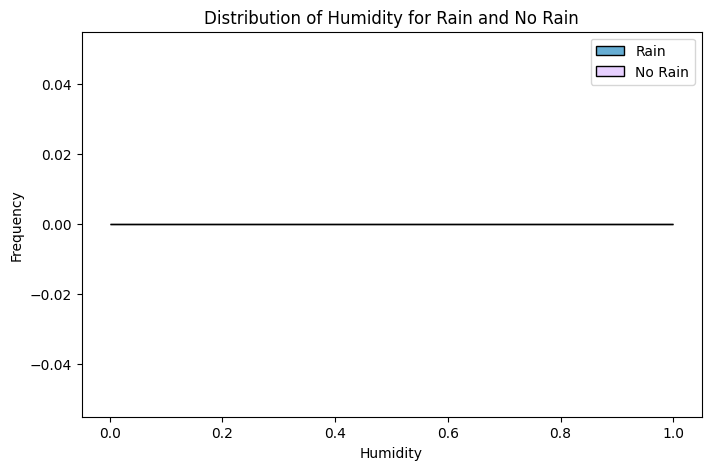

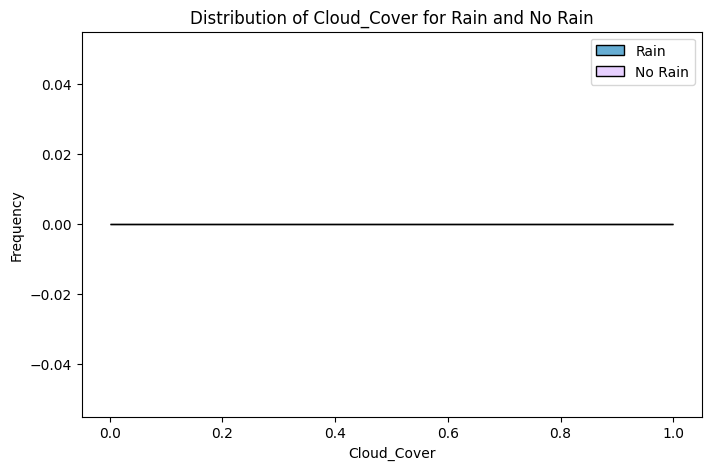

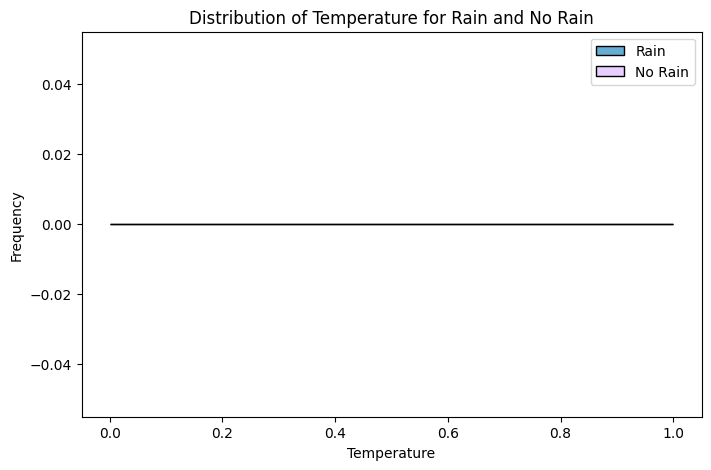

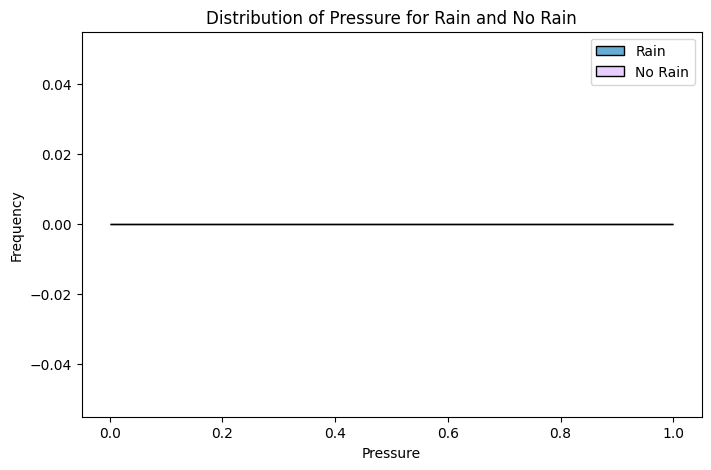

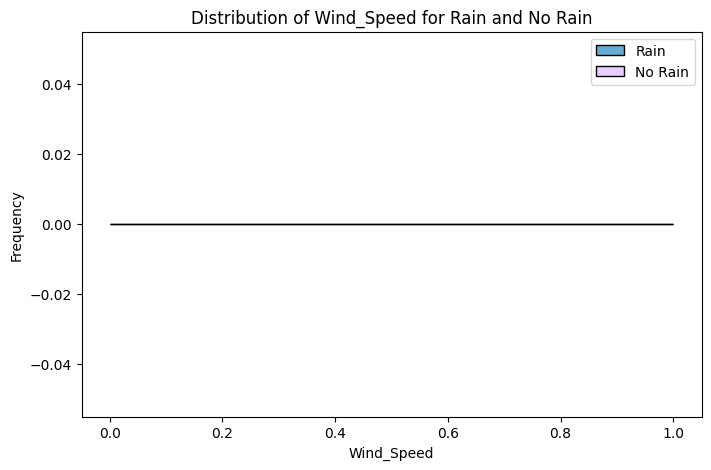

In [29]:
# Define the color selection
color_selection = [colors[0], colors[3]]  

# Generate distribution plots
for feature in features_to_test:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=rain_data, x=feature, label='Rain', kde=True, color=color_selection[0], alpha=0.6)
    sns.histplot(data=no_rain_data, x=feature, label='No Rain', kde=True, color=color_selection[1], alpha=0.6)
    plt.title(f'Distribution of {feature} for Rain and No Rain')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [30]:
correlation_matrix = df.corr()

# Extract correlation with the target variable 'Rain'
target_correlation = correlation_matrix['Rain'].sort_values(ascending=False)

# Display the correlation values with the target variable
styled_correlation = target_correlation.to_frame().style.background_gradient(cmap=cmap)
styled_correlation

,Rain
Temperature,nan
Humidity,nan
Wind_Speed,nan
Cloud_Cover,nan
Pressure,nan
Rain,nan


In [31]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>ANOMALY DETECTION</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

In [32]:
X = df.drop('Rain', axis=1)  # Exclude the target variable from anomaly detectionX = df.drop('Rain', axis=1)  # Exclude the target variable from anomaly detection

In [33]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # 5% contamination by default
iso_forest.fit(X)

# Predict anomalies: -1 indicates an anomaly, 1 indicates normal
outliers = iso_forest.predict(X)

# Add the outlier labels to the DataFrame
df['Anomaly'] = outliers

# Display the counts of normal and anomalous points
print("Anomaly Detection Results:")
print(df['Anomaly'].value_counts())

Anomaly Detection Results:
Anomaly
 1    2375
-1     125
Name: count, dtype: int64


The Isolation Forest model has identified 125 anomalies (about 5% of the total data, as specified by the contamination parameter). This approach helps detect potential outliers or unusual observations in the dataset.

In [34]:
# Identify anomalies in the dataset
anomalies = df[df['Anomaly'] == -1]  

# Display the number of anomalies and the first few rows of detected anomalies
print(f"Number of anomalies detected: {anomalies.shape[0]}")
anomalies.head()

Number of anomalies detected: 125


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Anomaly
13,33.139916,90.326477,5.771774,99.910178,987.803792,NaN,-1
23,29.513229,90.087869,3.520304,0.786690,1040.713073,NaN,-1
35,25.440887,99.538365,4.169966,92.792009,1042.703411,NaN,-1
43,11.505637,98.105353,2.380271,85.460413,1048.959121,NaN,-1
69,12.402460,58.422611,10.303175,97.468345,1049.703355,NaN,-1


In [35]:
# Remove outliers from the data
df_cleaned = df[df['Anomaly'] == 1].drop(columns=['Anomaly'])

In [36]:
# HTML and CSS for the styled box
html_code = """
<div style="
    background-color: #b3d9ff; 
    border: 2px solid #0073e6; 
    border-radius: 10px; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    font-size: 20px; 
    color: #004080; 
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
    <b>MODEL TRAINING AND EVALUATION</b>
</div>
"""

# Display the styled box in Jupyter Notebook
display(HTML(html_code))

In [37]:
# Split the cleaned data into features and target
X_cleaned = df_cleaned.drop('Rain', axis=1)
y_cleaned = df_cleaned['Rain']

In [38]:
# Split the dataset into the Training set and Test set
X_train, X_val, y_train, y_val = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [39]:
# Displaying the shapes of the resulting datasets for verification
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)

Training features shape: (1900, 5)
Validation features shape: (475, 5)
Training target shape: (1900,)
Validation target shape: (475,)


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [41]:
# Train and evaluate a given model on training and validation data.
def train_and_evaluate_model(name, model, X_train, y_train, X_val, y_val):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    report = classification_report(y_val, y_pred, output_dict=True)
    
    print(f"\n{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC: {auc:.4f}")
    
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=cmap)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    return {
        "Accuracy": accuracy,
        "AUC": auc,
        "Report": pd.DataFrame(report).T,
        "Confusion Matrix": cm
    }

In [42]:
# Perform cross-validation on a given model.
def cross_validate_model(name, model, X, y, cv):
    print(f"Evaluating {name} using cross-validation...")
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(accuracy_score))
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    return {
        "Mean Accuracy": accuracy_scores.mean(),
        "Mean AUC": auc_scores.mean(),
        "Accuracy Scores": accuracy_scores,
        "AUC Scores": auc_scores
    }

In [43]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42)
}

In [44]:
# Split the cleaned data into features and target 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross-validation
cross_val_results = {}
for name, model in models.items():
    cross_val_results[name] = cross_validate_model(name, model, X_cleaned, y_cleaned, cv)

# Display cross-validation results
print("\nCross-Validation Results Summary:\n" + "="*40)
results_df = pd.DataFrame({
    name: {"Mean Accuracy": result["Mean Accuracy"], "Mean AUC": result["Mean AUC"]}
    for name, result in cross_val_results.items()
}).T.sort_values(by="Mean AUC", ascending=False)
print(results_df)
print("="*40)
# Select the best model based on mean AUC
best_model_name = results_df['Mean AUC'].idxmax()
print(f"\nThe best model based on Mean AUC from cross-validation is: {best_model_name} with an AUC of {results_df['Mean AUC'].max():.4f}")

Evaluating Logistic Regression using cross-validation...


ValueError: Input y contains NaN.